In [131]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stat
import pylab
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [132]:
original_data=pd.read_csv('archive-2/data.csv')
df=original_data.copy()

In [133]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


#### There is no null Values which is a Good Start

In [134]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

# Expolatory Data Analysis

<AxesSubplot:xlabel='Owner', ylabel='count'>

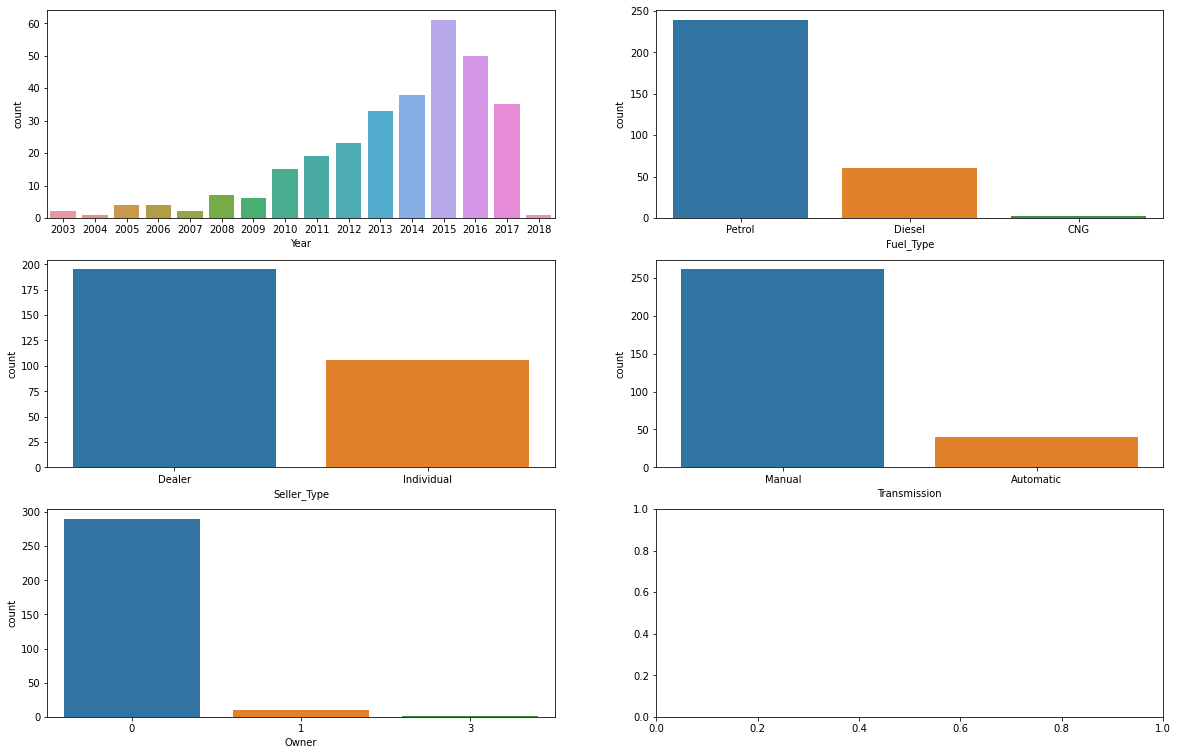

In [135]:
fig, axes=plt.subplots(nrows=3, ncols=2)
fig.set_size_inches(20, 13)


sns.countplot(x=df['Year'], ax=axes[0][0])
sns.countplot(x=df['Fuel_Type'], ax=axes[0][1])
sns.countplot(x=df['Seller_Type'], ax=axes[1][0])
sns.countplot(x=df['Transmission'], ax=axes[1][1])
sns.countplot(x=df['Owner'], ax=axes[2][0])




In [136]:
#! Another  cool way to plot

# def plot(number):
#     cat_cols = ['Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']
#     i = 0
#     while i < number:
#         fig = plt.figure(figsize=[15, 5])
#     #ax1 = fig.add_subplot(121)
#     #ax2 = fig.add_subplot(122)

#     #ax1.title.set_text(cat_cols[i])
#         plt.subplot(1, 2, 1)
#         sns.countplot(x=cat_cols[i], data=df)
#         i += 1

#     #ax2.title.set_text(cat_cols[i])
#         plt.subplot(1, 2, 2)
#         sns.countplot(x=cat_cols[i], data=df)
#         i += 1

#         plt.show()
    
# plot(4)


#### We can clearly see that not all data is equally distributed for all the attributes such as -

1. Year has very few data from 2003 to 2011 and surpisngly 2018 also has very few data
2. Data for CNG also very less compared to Petrol 


<AxesSubplot:xlabel='Kms_Driven', ylabel='Selling_Price'>

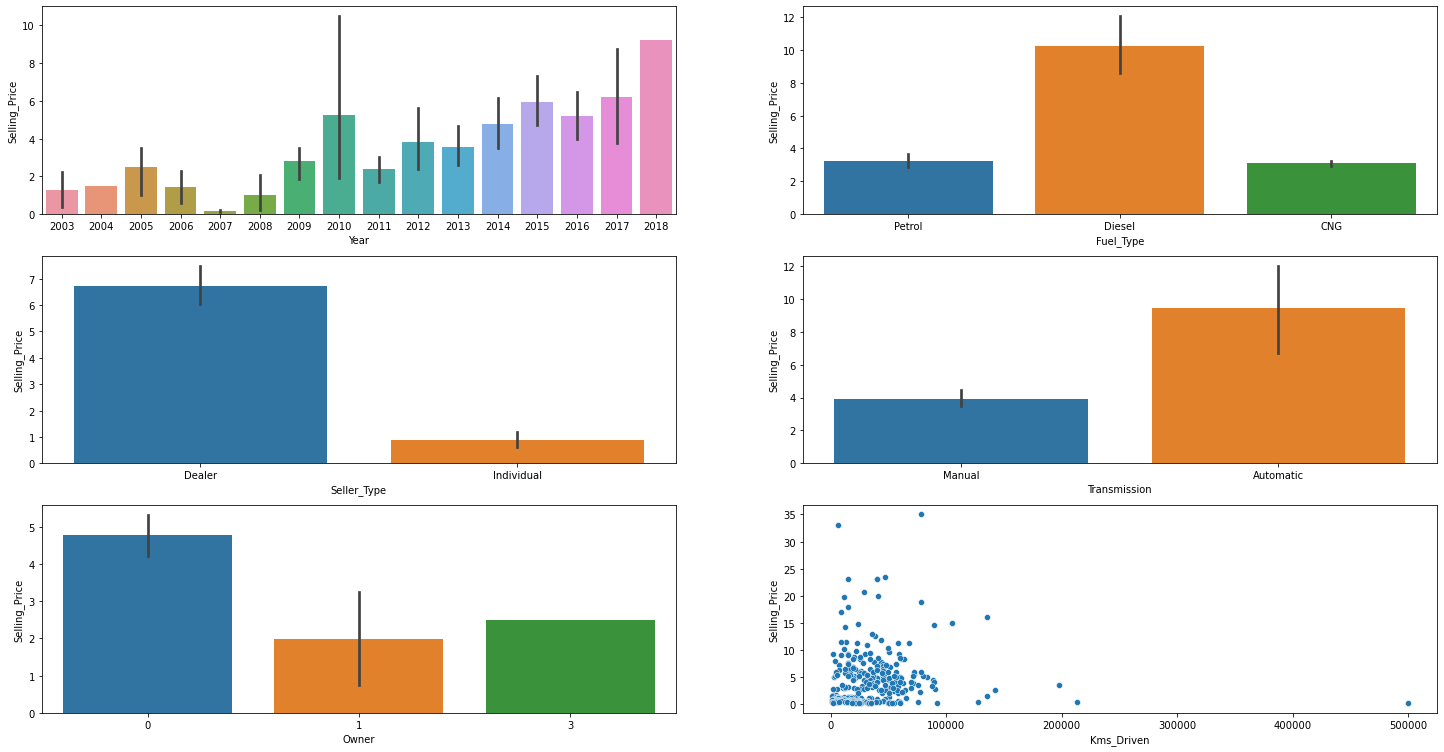

In [137]:
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_size_inches(25, 13)

sns.barplot(x=df['Year'],y=df['Selling_Price'] ,ax=axes[0][0])
sns.barplot(x=df['Fuel_Type'], y=df['Selling_Price'], ax=axes[0][1])
sns.barplot(x=df['Seller_Type'], y=df['Selling_Price'], ax=axes[1][0])
sns.barplot(x=df['Transmission'], y=df['Selling_Price'], ax=axes[1][1])
sns.barplot(x=df['Owner'], y=df['Selling_Price'], ax=axes[2][0])
sns.scatterplot(x=df['Kms_Driven'], y=df['Selling_Price'], ax=axes[2][1])


#### From these graphs we can conclude that,
- As the car gets old, the price starts dropping, the **Year** graph looks disproportionate because not all the data is not equally available, otherwise be would have seen a linear graph

-  The price of Diesel cars is highest compared to other, which is strange because Diesel cars have particular life period.
-   Price  Automatic cars from Dealership is high which makes sense, because very few like shifting gears while driving. I also personally prefer Automatic Cars

<AxesSubplot:xlabel='Present_Price', ylabel='Selling_Price'>

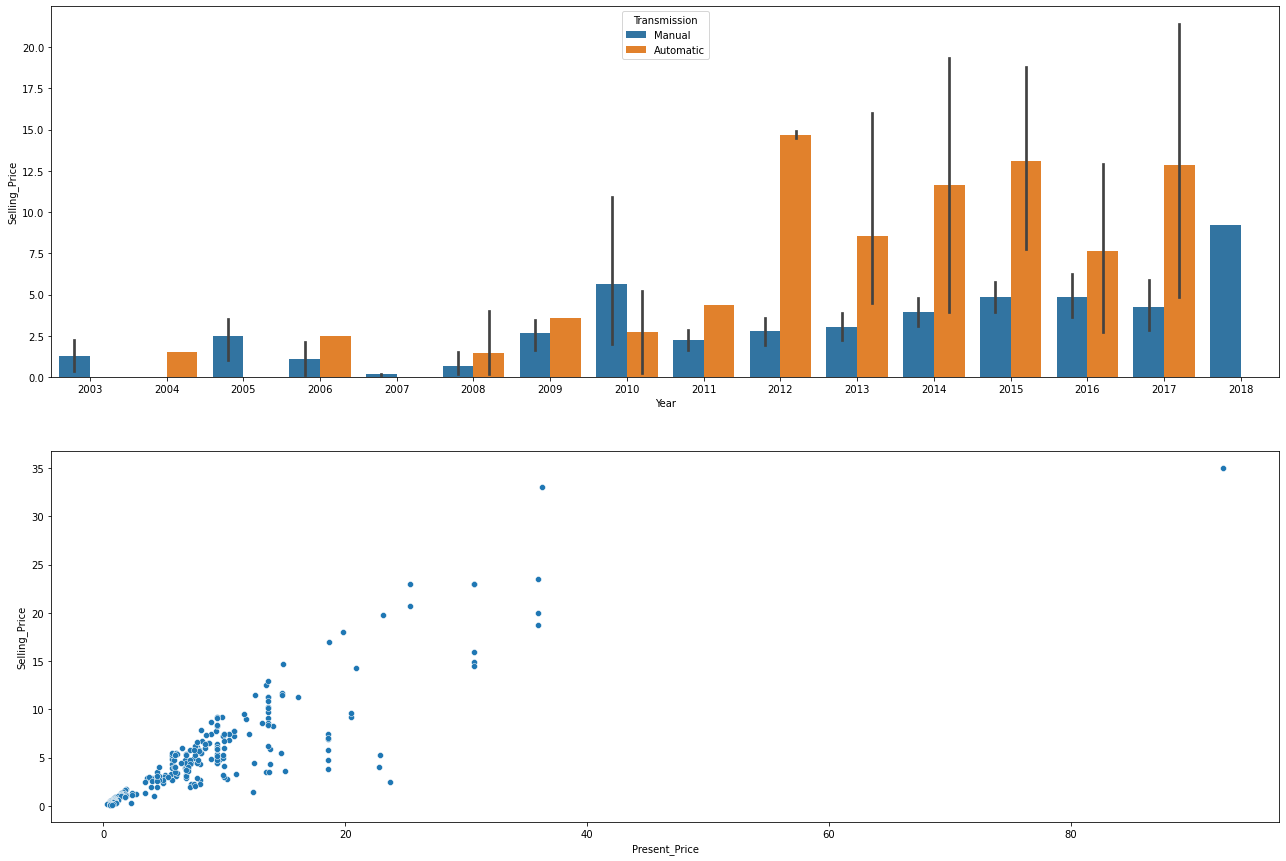

In [138]:
fig, (ax1, ax2) = plt.subplots(nrows=2)
fig.set_size_inches(22, 15)
sns.barplot(x=df['Year'], y=df['Selling_Price'],hue=df['Transmission'], ax=ax1)
sns.scatterplot(x=df['Present_Price'], y=df['Selling_Price'], ax=ax2)

- #### From 2012 Automatic Cars have been dominating the Car Industry

- #### Selling price of the car is directly Proptional to the current price of the car

# Feature Engineering

In [139]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


#### Transforming Year in a much better way for ML Algos

In [140]:
df['Year']=2020-df['Year']

#### Converting Categorical Data into Numerical by Mapping

In [141]:
# Fuel Type
df['Fuel_Type']=df['Fuel_Type'].map({
    'Petrol':0,
    'CNG':1,
    'Diesel':2
})
df['Fuel_Type']=df['Fuel_Type'].astype(int)

# Seller Type
df['Seller_Type'] = df['Seller_Type'].map({
    'Dealer': 0,
    'Individual': 1,
})
df['Seller_Type'] = df['Seller_Type'].astype(int)

# Transmission
df['Transmission'] = df['Transmission'].map({
    'Manual': 0,
    'Automatic': 1,
})
df['Seller_Type'] = df['Seller_Type'].astype(int)


### Using Q-Q plot to check which features are in Gausian Distribution

Selling_Price


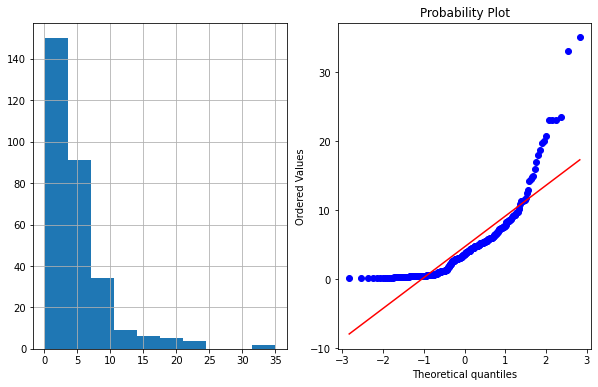

Present_Price


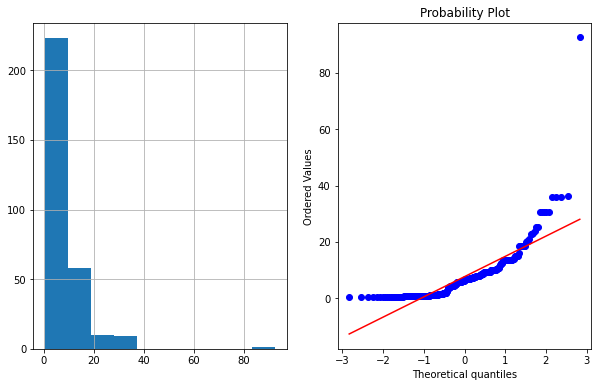

Kms_Driven


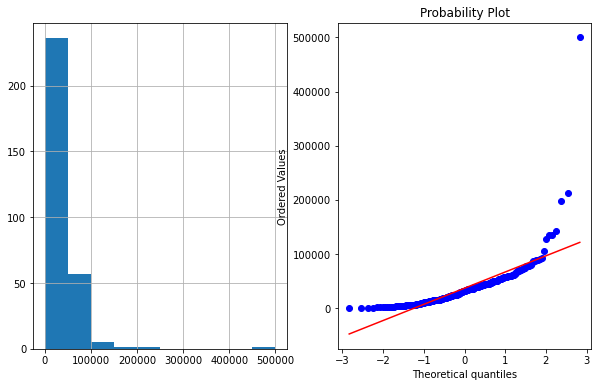

In [142]:
def plot_data(df, feature):
    # This is for the left graph
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    print(feature)
    df[feature].hist()
    plt.subplot(1, 2, 2)
    stat.probplot(df[feature], dist='norm', plot=pylab)
    plt.show()


plot_data(df, 'Selling_Price')
plot_data(df, 'Present_Price')
plot_data(df, 'Kms_Driven')



### By Using BoxCox Transformation fixed the Skewness of Data

Selling_Price


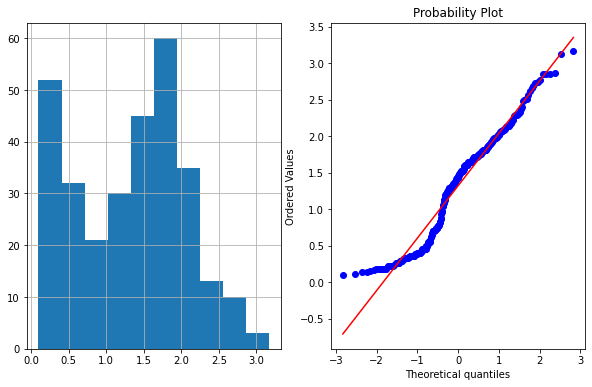

Present_Price


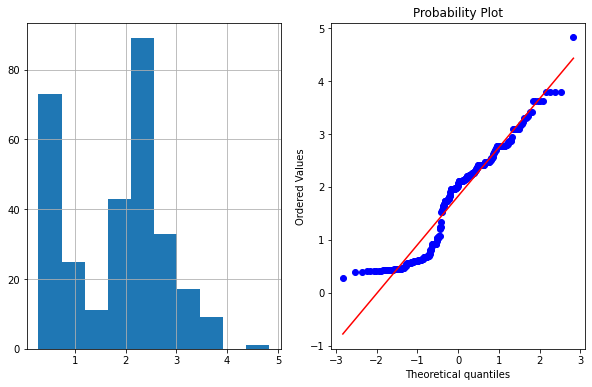

Kms_Driven


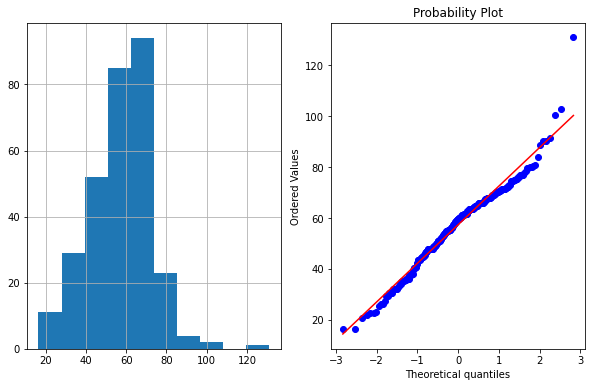

In [143]:
df['Selling_Price'], parameters = stat.boxcox(df['Selling_Price']+1)
plot_data(df, 'Selling_Price')

df['Present_Price'],parameters=stat.boxcox(df['Present_Price']+1)
plot_data(df,'Present_Price')

df['Kms_Driven'],parameters=stat.boxcox(df['Kms_Driven']+1)
plot_data(df,'Kms_Driven')

### Scaling the Features through Min-Max Scaler

In [144]:
df_dropped=df.drop(labels=['Car_Name'], axis=1)

min_max=MinMaxScaler()
df_scaled=pd.DataFrame(min_max.fit_transform(df_dropped), columns=df_dropped.columns)

df_scaled.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,0.266667,0.423556,0.364042,0.350793,0.0,0.0,0.0,0.0
1,0.333333,0.504644,0.473345,0.422740,1.0,0.0,0.0,0.0
2,0.066667,0.607234,0.480137,0.185971,0.0,0.0,0.0,0.0
3,0.466667,0.387569,0.307202,0.158884,0.0,0.0,0.0,0.0
4,0.266667,0.497030,0.405195,0.420623,1.0,0.0,0.0,0.0


# Feature Selection

#### Finding which are the most Important Features

In [145]:
corr_matrix=df.drop(labels=['Car_Name'], axis=1).corr()

corr_matrix['Selling_Price'].sort_values(ascending=False)

Selling_Price    1.000000
Present_Price    0.943252
Fuel_Type        0.521078
Transmission     0.224267
Kms_Driven       0.163405
Owner           -0.103376
Year            -0.259694
Seller_Type     -0.829908
Name: Selling_Price, dtype: float64

#### Present Price and Fuel type are one of the main factors to determing the price to sell the car

#### Feature Correlation

<AxesSubplot:>

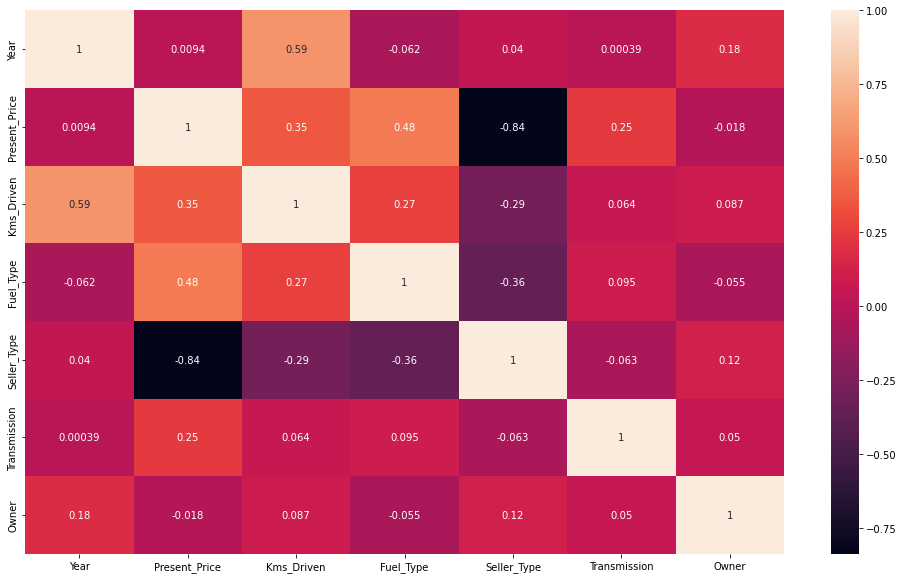

In [146]:
def correlationMap():

    corr = df.drop(labels=['Selling_Price'], axis=1).corr()
    top_features = corr.index
    plt.figure(figsize=(17, 10))
    return sns.heatmap(df[top_features].corr(), annot=True)


correlationMap()


#### There are no Correlated Features :D

# Moel Selection

In [147]:



X=df_scaled.drop(labels=['Selling_Price'], axis=1)
y=df['Selling_Price']

X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3)

X_train.shape, X_test.shape

((210, 7), (91, 7))

#### Random Forest Regressor

In [148]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)


cv_scores = cross_val_score(rfr, X_train, y_train, cv=10)
print(cv_scores)
print()
print('Accuracy =', cv_scores.mean())


[0.98719766 0.95811617 0.98751401 0.96630335 0.97406367 0.98935161
 0.98520384 0.93721939 0.96320679 0.91310079]

Accuracy = 0.9661277275897839


#### Decision Tree Regresso

In [149]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

cv_scores = cross_val_score(dtr, X_train, y_train, cv=10)
print(cv_scores)
print()
print('Accuracy =', cv_scores.mean())


[0.96616501 0.91110335 0.97769223 0.95822588 0.97479958 0.9845177
 0.97493917 0.95873662 0.91003699 0.94398869]

Accuracy = 0.9560205219847975


In [150]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train, y_train)

cv_scores = cross_val_score(ridge, X_train, y_train, cv=10)
print(cv_scores)
print()
print('Accuracy =', cv_scores.mean())


[0.95472887 0.96273166 0.963954   0.90393744 0.90304444 0.96285912
 0.97885201 0.96671307 0.93228217 0.90223565]

Accuracy = 0.9431338451619047


### Random Forest Regressor is Giving the best Accuracy :D

# If you like my work Please give it a UpVote :D